In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [2]:
df = pd.read_csv('US_Ecommerce_records_2020.csv')

# Data Cleaning

In [3]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [4]:
df.isnull().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

There is no "null value" in this dataset and no duplicated data. The dataset is pretty clean and we are ready to start analyzing the data from here.

## Step 1: Look into Profit Margin


In [7]:
df['profit margin']=df['Profit']/ df['Sales']
df.sort_values(by=['profit margin'])

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit margin
991,08-06-20,262,US-2017-155299,Standard Class,Dl-13600,Corporate,United States,Pasadena,Texas,77506,Central,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,-2.75
381,18-03-20,677,US-2017-119438,Standard Class,CD-11980,Consumer,United States,Tyler,Texas,75701,Central,OFF-AP-10000804,Office Supplies,Appliances,Hoover Portapower Portable Vacuum,2.688,3,0.8,-7.3920,-2.75
498,31-03-20,6562,CA-2017-144680,First Class,SC-20260,Corporate,United States,Arlington,Texas,76017,Central,OFF-AP-10003040,Office Supplies,Appliances,Fellowes 8 Outlet Superior Workstation Surge P...,33.620,5,0.8,-90.7740,-2.70
1666,02-09-20,6904,CA-2017-111220,Standard Class,JS-15595,Corporate,United States,Chicago,Illinois,60653,Central,OFF-AP-10003278,Office Supplies,Appliances,Belkin 7-Outlet SurgeMaster Home Series,5.588,2,0.8,-15.0876,-2.70
3080,11-12-20,6990,CA-2017-165099,First Class,DK-13375,Consumer,United States,Abilene,Texas,79605,Central,OFF-AP-10001634,Office Supplies,Appliances,Hoover Commercial Lightweight Upright Vacuum,1.392,2,0.8,-3.7584,-2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,02-12-20,2353,CA-2017-109701,Same Day,AM-10360,Corporate,United States,Los Angeles,California,90032,West,OFF-AR-10001868,Office Supplies,Art,Prang Dustless Chalk Sticks,10.080,6,0.0,5.0400,0.50
461,27-03-20,8488,CA-2017-124716,Standard Class,BD-11560,Home Office,United States,Fresno,California,93727,West,OFF-PA-10000859,Office Supplies,Paper,Unpadded Memo Slips,11.940,3,0.0,5.9700,0.50
1238,08-07-20,1621,CA-2017-108560,Standard Class,JC-15385,Consumer,United States,Kent,Washington,98031,West,FUR-FU-10002937,Furniture,Furnishings,"GE 48"" Fluorescent Tube, Cool White Energy Sav...",198.460,2,0.0,99.2300,0.50
495,31-03-20,5562,CA-2017-133263,Second Class,JE-15610,Corporate,United States,Atlanta,Georgia,30318,South,OFF-BI-10001153,Office Supplies,Binders,Ibico Recycled Grain-Textured Covers,34.540,1,0.0,17.2700,0.50


In [8]:
df0 = df.query('Discount == 0').sort_values(by=['profit margin'])

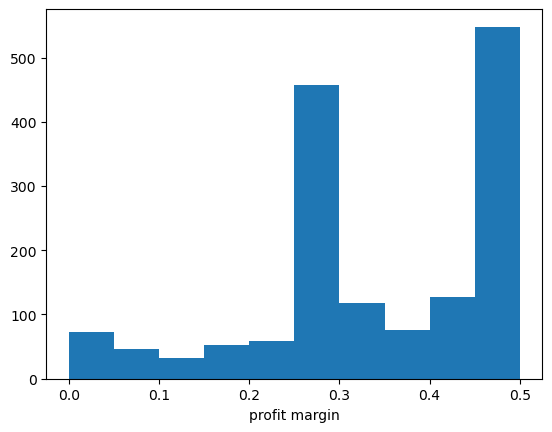

In [9]:
_=plt.hist(df0['profit margin'])
_=plt.xlabel('profit margin')
plt.show()

From the histgram, we have about 80 products have 0.0-0.05 profit margin and about total 250 products have profit margin less than 0.25. This is based on 0.0 discount rate, which means when a discount rate put on some of those products, they generate negative profits. We need to adjust those low profit margin products' unit price to make all the products' profit margin fall between 0.25-0.5.

In [10]:
low_pm=df0[df0['profit margin'] < 0.25]
low_pm.value_counts().sum()

263

In [11]:
low_pm.value_counts().sum()/df0.value_counts().sum()

0.16540880503144653

16.5% of the produces have profit margin that is lower than 0.25. We are going to focus on those products to see their segments, category, sub-category and region and how much sales they provided. 

## Look into the segments for produces with lower than 0.25 profit margin


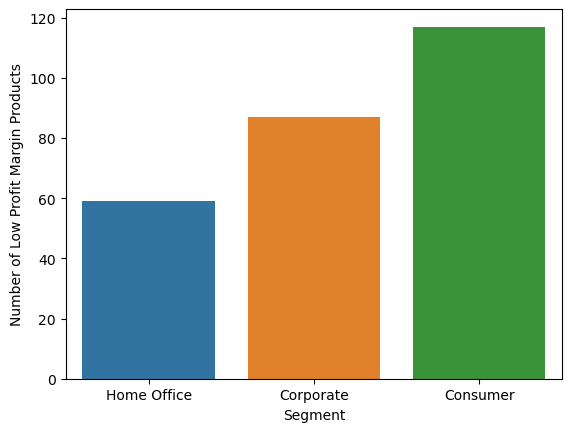

In [12]:
sns.countplot(x='Segment', data = low_pm)
plt.xlabel('Segment')
plt.ylabel('Number of Low Profit Margin Products')
plt.show()

Among products with less than 0.25 profit margin, consumer segment has the most number of products while home office has the least number of products. 

In [13]:
all_low_pm = df[(df['profit margin']<0.25) & (df['profit margin']>0.0)]

Include products that have less then 0.25 profit but also have discount rate in the all_low_pm. 

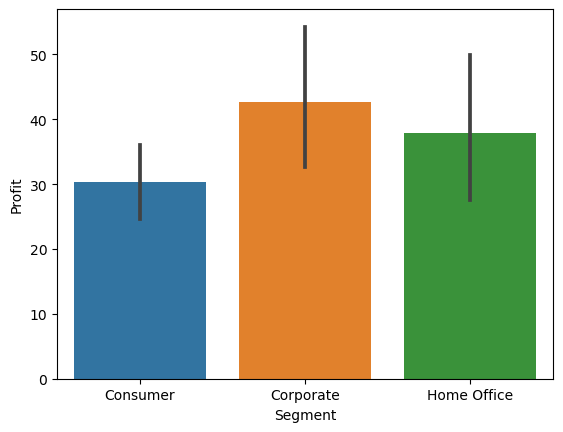

In [14]:
sns.barplot(x='Segment', y='Profit', data = all_low_pm)
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

Since Consumer has the most number of produces with less than 0.25 profit margin, consumer generates the least profit from those products. While in Corporate segment, though it has quite a few products with less then 0.25 profit margin, it generates the most the profit from those products. Thus, I recommend we focus on adjusting the profit margin in Consumer Segment. 

## Look into categories for products with lower than 0.25 profit margin


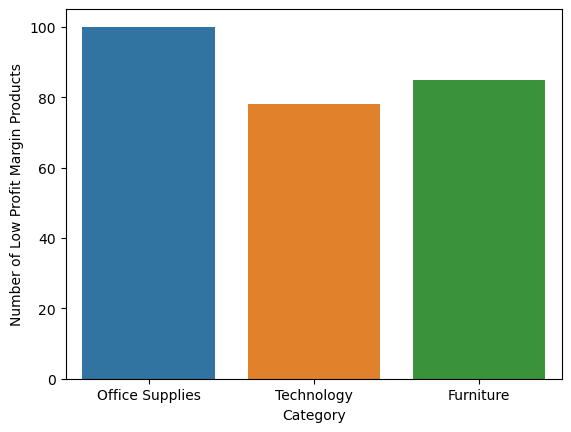

In [15]:
sns.countplot(x='Category', data = low_pm)
plt.xlabel('Category')
plt.ylabel('Number of Low Profit Margin Products')
plt.show()

Among products with less than 0.25 profit margin, office supplies category has the most number of products while technology category has the least number of products. 

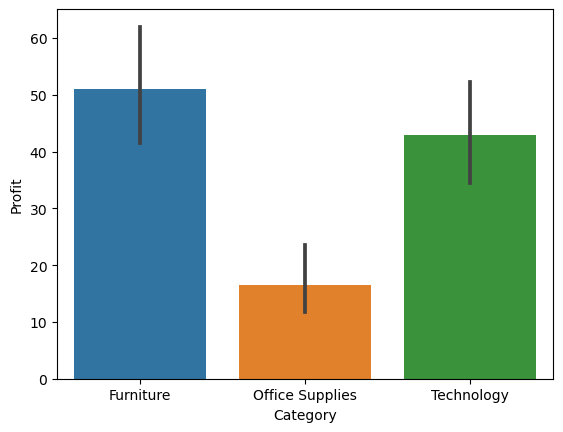

In [16]:
sns.barplot(x='Category', y='Profit', data = all_low_pm)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

Since office supplies category has the most number of produces with less than 0.25 profit margin, it generates the least profit from those products. While in furniture category, though it has quite a few products with less then 0.25 profit margin, it generates the most the profit from those products. Thus, I recommend we focus on adjusting the profit margin in Office Supplies category. 

## Look into sub-category for products with lower than 0.25 profit margin

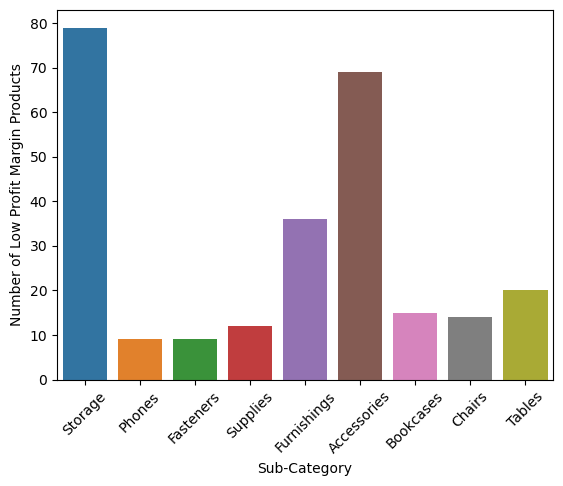

In [17]:
sns.countplot(x='Sub-Category', data = low_pm)
plt.xlabel('Sub-Category')
plt.ylabel('Number of Low Profit Margin Products')
plt.xticks(rotation = 45)
plt.show()

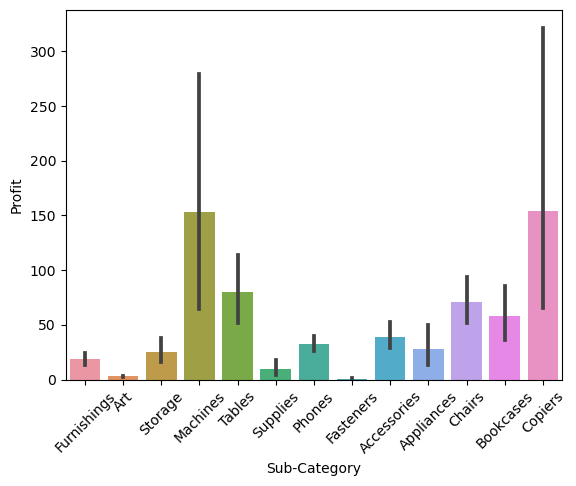

In [18]:
sns.barplot(x='Sub-Category', y='Profit', data = all_low_pm, )
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation =45)
plt.show()

We need to make adjustments in Storage, Accessories and Furnishings sub-categories, since they have the most number of low profit margin products and also low profits. Machines and copies are not in the first chart under sub-category, because their original profit margin (with discount = 0.0) is higher than 0.25, after some discount, their profit margin fall below 0.25, but still make good amount of profits. 

## Look into region for products with lower than 0.25 profit margin


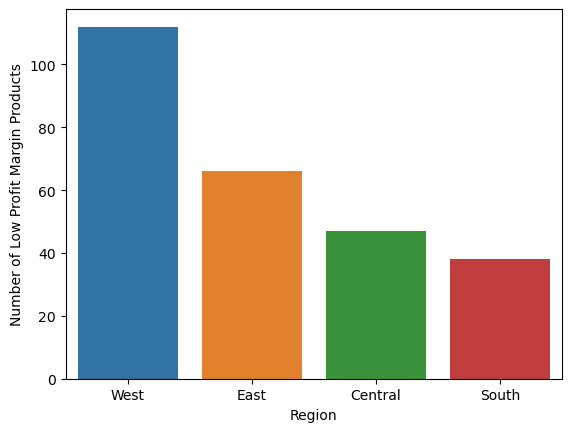

In [19]:
sns.countplot(x='Region', data = low_pm)
plt.xlabel('Region')
plt.ylabel('Number of Low Profit Margin Products')
plt.show()

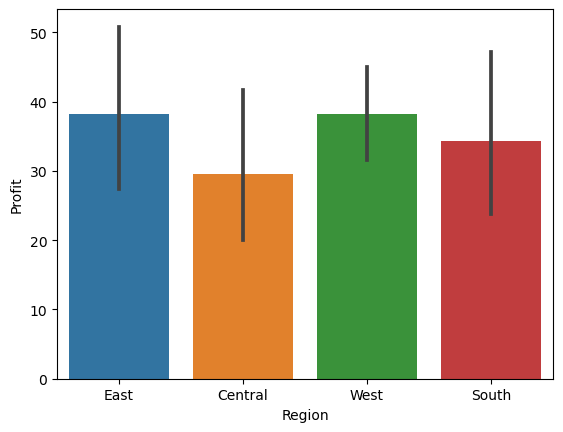

In [20]:
sns.barplot(x='Region', y='Profit', data = all_low_pm)
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

We need to look into Central region. It doesn't have many products with lower than 0.25 profit margin, however it generates the least profits. We assume we can't adjust unit original price in different region, we may adjust the discount rate in that region. 

## Step 2: Look into Discount Rate
According to the profit margin histgram above, all the products profit margin is between 0.0-0.5. We are going to look into the discount rate that are above 0.5.

In [21]:
high_dr = df[df['Discount']>0.5]
high_dr.value_counts().sum()

284

In [22]:
high_dr.value_counts().sum()/df.value_counts().sum()

0.08574879227053141

About 8.6% of total products have more than 0.5 discount rate, which means those products generate negative profits. We want to look into those products to generate insights. 

In [30]:
low_pm_high_dr = pd.concat([low_pm,high_dr])
low_pm_high_dr.duplicated(['Product Name']).sum()

181

In [32]:
low_pm_high_dr[low_pm_high_dr.duplicated(['Product Name'])]['Profit'].sum()

-3606.5283

181 products have both lower than 0.25 profit margin and higher than 0.5 discount rate, which generates -3606.5283 profits. 

In [33]:
high_dr['Profit'].sum()

-27284.092600000004

Profits from all the sales, where the discount rate is more than 0.5 is -$27,284. 

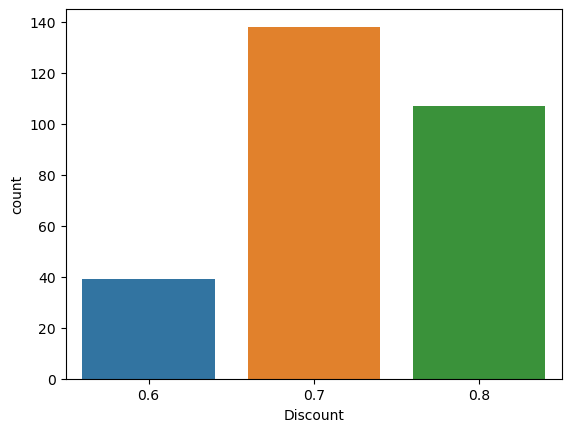

In [38]:
sns.countplot(x='Discount', data = high_dr)
plt.show()

## Look into Segments for products with higher than 0.5 discount rate

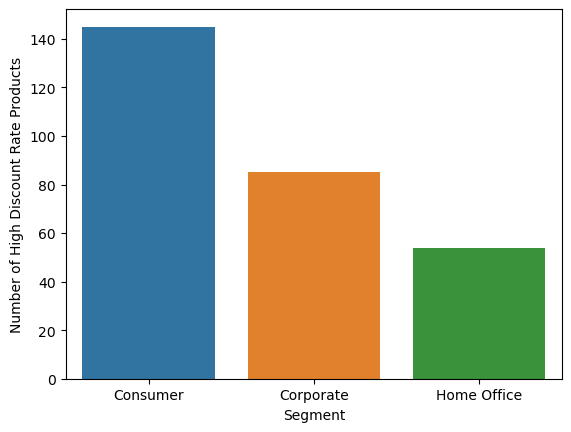

In [39]:
sns.countplot(x='Segment', data = high_dr)
plt.xlabel('Segment')
plt.ylabel('Number of High Discount Rate Products')
plt.show()

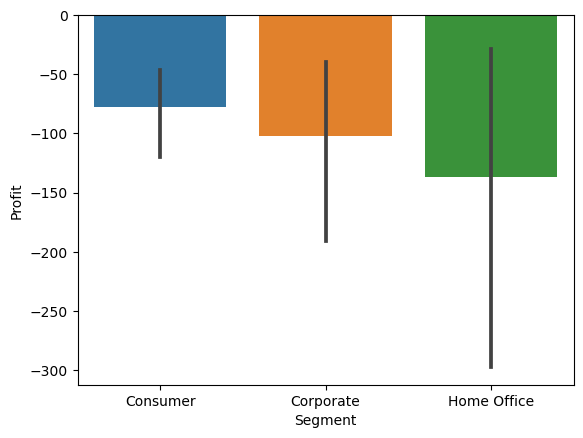

In [40]:
sns.barplot(x='Segment', y='Profit', data = high_dr)
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

Though Home Office segment has the lowest number of products with high discount rate, it generates the most negative profits. We need to look into the home office segment to adjust the discount rate. 

## Look into the Categories for products with higher than 0.5 discount rate.

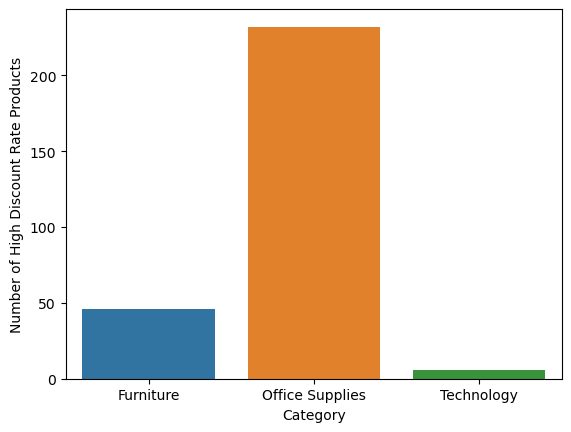

In [41]:
sns.countplot(x='Category', data = high_dr)
plt.xlabel('Category')
plt.ylabel('Number of High Discount Rate Products')
plt.show()

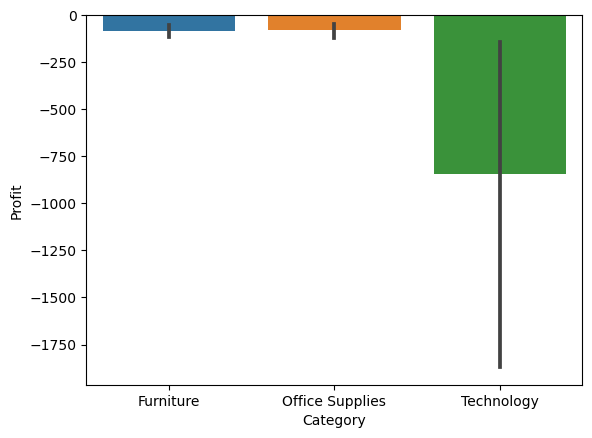

In [42]:
sns.barplot(x='Category', y='Profit', data = high_dr)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

Here we need to look into Technology category, since it has the least number of high discount rate produt, but generates the most negative profits. 

## Look into Sub-Categories for products with higher than 0.5 discount rate

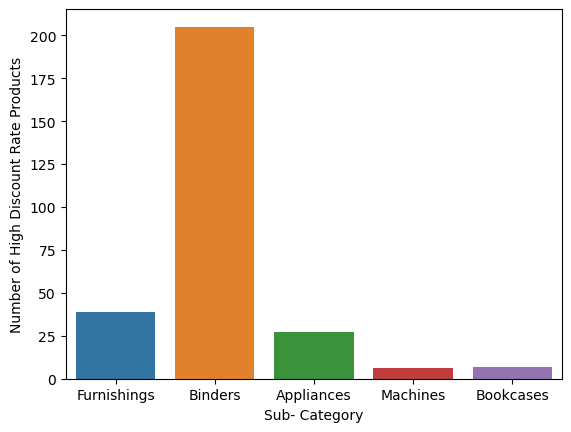

In [43]:
sns.countplot(x='Sub-Category', data = high_dr)
plt.xlabel('Sub- Category')
plt.ylabel('Number of High Discount Rate Products')
plt.show()

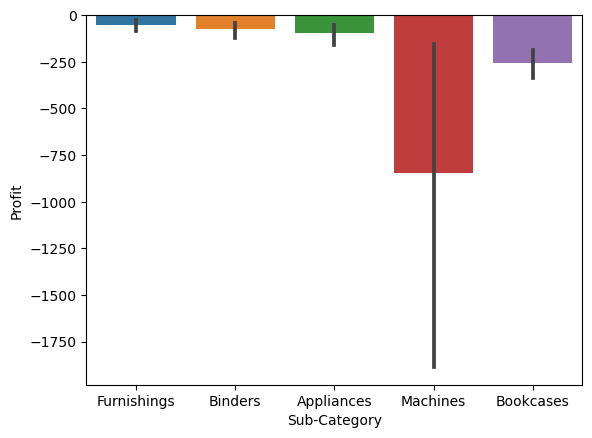

In [44]:
sns.barplot(x='Sub-Category', y='Profit', data = high_dr)
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()

For sub-category, we need to look into Machines, since it has the least number of products with high discount rate, but generates the most negative profits. 

## Look into Region for products with higher than 0.5 discount rate

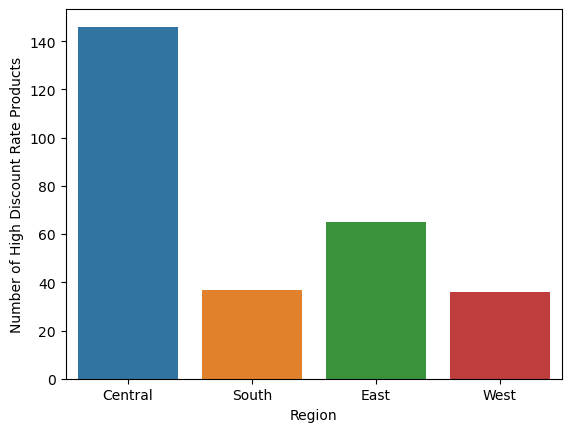

In [45]:
sns.countplot(x='Region', data = high_dr)
plt.xlabel('Region')
plt.ylabel('Number of High Discount Rate Products')
plt.show()

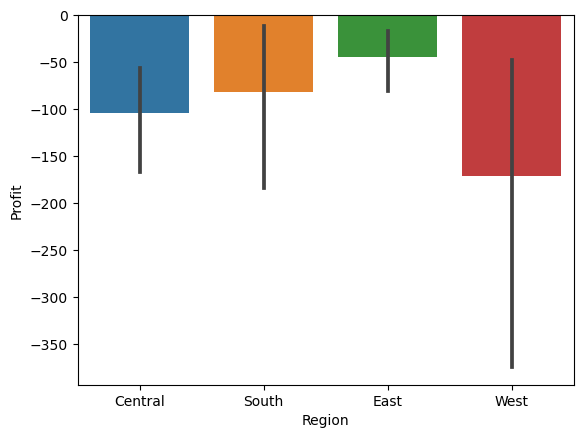

In [46]:
sns.barplot(x='Region', y='Profit', data = high_dr)
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

For Region, we need to look into West region, since it has the least number of high discount rate products but generates the most negative profits. 

## Step 3: Look into Discount Period

In [51]:
df['month'] = pd.DatetimeIndex(df['Order Date']).month
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit margin,month
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,0.1750,1
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,0.4200,1
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,0.4800,1
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,-0.2375,1
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,-1.3250,1


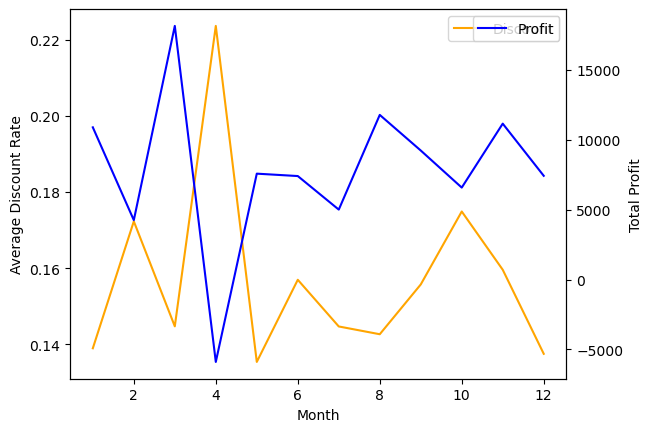

In [78]:
ax = df.groupby('month')['Discount'].mean().plot(color='orange',label='Discount')
ax.legend()
ax2 = ax.twinx()
ax2= df.groupby('month')['Profit'].sum().plot(color='blue', label ='Profit')
ax2.legend()

ax.set_xlabel('Month')
ax.set_ylabel('Average Discount Rate')
ax2.set_ylabel('Total Profit')
plt.show()

The average discount rate in April is the highest, which caused the total profit in April is the lowest and is the only month that has total negative profits throughout the year. 